# DBSCAN

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [2]:
# prepare the dataset

X_blobs, y_blobs, c_blobs = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0, n_features=2, return_centers=True)

In [3]:
df_blobs = pd.DataFrame(X_blobs, columns=['x1', 'x2'])
df_blobs.head()

,x1,x2
0,2.402380,1.107456
1,3.437618,0.261654
2,1.003725,4.191477
3,0.282561,4.772506
4,1.271351,1.892542


In [4]:
df_centers = pd.DataFrame(c_blobs, columns=['x1', 'x2'])
df_centers.head()

,x1,x2
0,0.976270,4.303787
1,2.055268,0.897664
2,-1.526904,2.917882
3,-1.248256,7.835460


In [5]:
df_blobs.shape, df_centers.shape

((500, 2), (4, 2))

In [6]:
X_moons, y_moons = make_moons(n_samples=250, noise=0.05, random_state=42)

In [7]:
df_moons = pd.DataFrame(X_moons, columns=['x1', 'x2'])
df_moons.head()

,x1,x2
0,0.084154,0.113341
1,1.050915,0.154710
2,-0.716555,0.675608
3,0.060932,0.926542
4,-1.005525,0.336425


In [8]:
df_moons.shape

(250, 2)

# Visualization

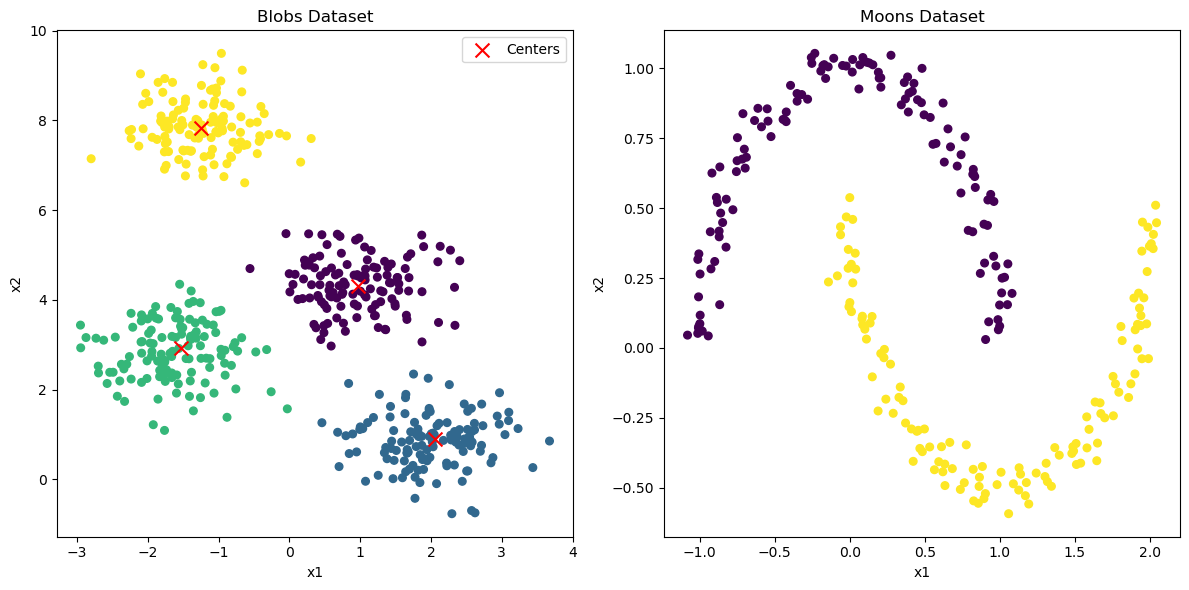

In [9]:
# Visualize the datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_blobs['x1'], df_blobs['x2'], c=y_blobs, cmap='viridis', s=30)
plt.scatter(df_centers['x1'], df_centers['x2'], color='red', marker='x', s=100, label='Centers')
plt.title('Blobs Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(df_moons['x1'], df_moons['x2'], c=y_moons, cmap='viridis', s=30)
plt.title('Moons Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()


# DBSCAN model implementation

Silhouette Score for DBSCAN on Blobs: 0.454


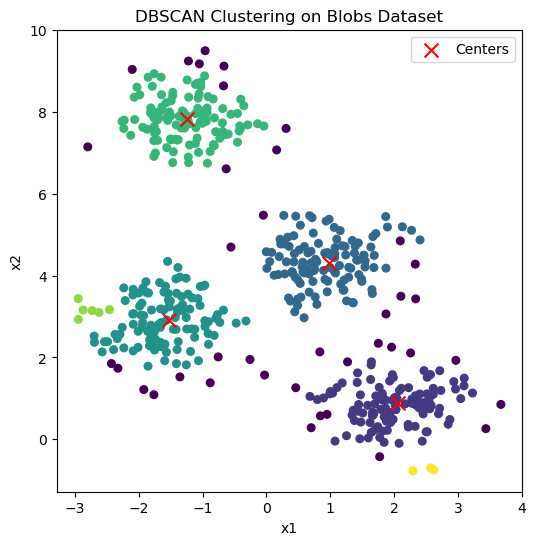

In [10]:
# DBSCAN Implementation
model_dbscan_blobs = DBSCAN(eps=0.3, min_samples=3)
model_dbscan_blobs.fit(X_blobs)
# Predict clusters
y_dbscan_blobs = model_dbscan_blobs.labels_
# Calculate silhouette score
silhouette_dbscan_blobs = silhouette_score(X_blobs, y_dbscan_blobs)
print(f'Silhouette Score for DBSCAN on Blobs: {silhouette_dbscan_blobs:.3f}')
# Visualize DBSCAN results on Blobs
plt.figure(figsize=(6, 6))
plt.scatter(df_blobs['x1'], df_blobs['x2'], c=y_dbscan_blobs, cmap='viridis', s=30)
plt.scatter(df_centers['x1'], df_centers['x2'], color='red', marker='x', s=100, label='Centers')
plt.title('DBSCAN Clustering on Blobs Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()  

Silhouette Score for DBSCAN on Moons: 0.324


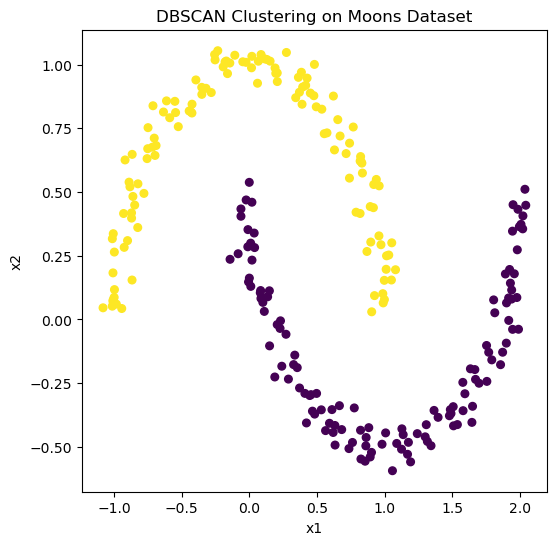

In [11]:
model_dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
model_dbscan_moons.fit(X_moons)
# Predict clusters
y_dbscan_moons = model_dbscan_moons.labels_
# Calculate silhouette score
silhouette_dbscan_moons = silhouette_score(X_moons, y_dbscan_moons)
print(f'Silhouette Score for DBSCAN on Moons: {silhouette_dbscan_moons:.3f}')
# Visualize DBSCAN results on Moons
plt.figure(figsize=(6, 6))
plt.scatter(df_moons['x1'], df_moons['x2'], c=y_dbscan_moons, cmap='viridis', s=30)
plt.title('DBSCAN Clustering on Moons Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()  

# Another way

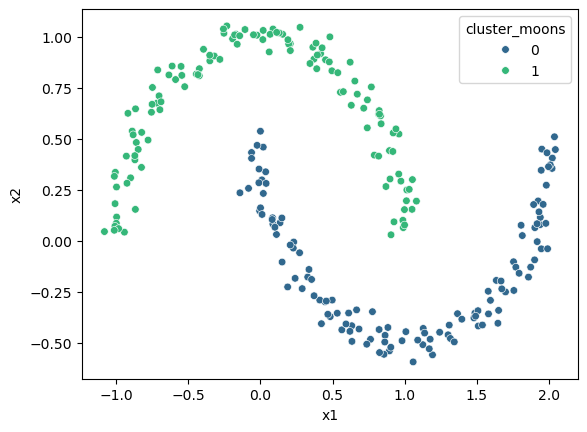

In [12]:
model_dbscan_moons = DBSCAN(eps=0.3, min_samples=3)
y_moons_predict = model_dbscan_moons.fit_predict(X_moons)
df_moons['cluster_moons'] = y_moons_predict
sns.scatterplot(data=df_moons, x='x1',y='x2', hue='cluster_moons', palette='viridis', s=30)
plt.show()

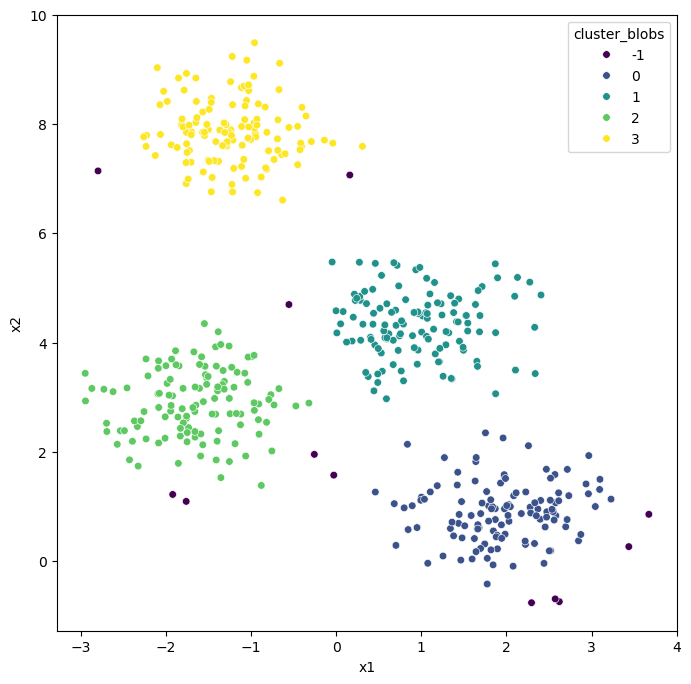

In [13]:
model_dbscan_blobs = DBSCAN(eps=0.5, min_samples=4)
y_blobs_predict = model_dbscan_blobs.fit_predict(X_blobs)
df_blobs['cluster_blobs'] = y_blobs_predict

fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster_blobs', palette='viridis', s=30)
plt.plot()
plt.show()

# How to select Hyperparameters

In [14]:
# import NearestNeighbors to find the optimal eps
from sklearn.neighbors import NearestNeighbors

In [15]:
model_knn = NearestNeighbors(n_neighbors=3)
model_knn.fit(X_blobs)
distances, indexes = model_knn.kneighbors(X_blobs)

In [16]:
distances

array([[0.        , 0.08115241, 0.11295526],
       [0.        , 0.60039946, 0.60590005],
       [0.        , 0.09806944, 0.12606547],
       ...,
       [0.        , 0.16431258, 0.20162964],
       [0.        , 0.33263614, 0.36311307],
       [0.        , 0.04626217, 0.05505329]], shape=(500, 3))

In [17]:
indexes

array([[  0, 353, 329],
       [  1,  43, 364],
       [  2, 248, 260],
       ...,
       [497, 301, 356],
       [498, 295, 303],
       [499, 465,  68]], shape=(500, 3))

In [18]:
distances.shape, indexes.shape

((500, 3), (500, 3))

## Chart of second nearest neighborn 

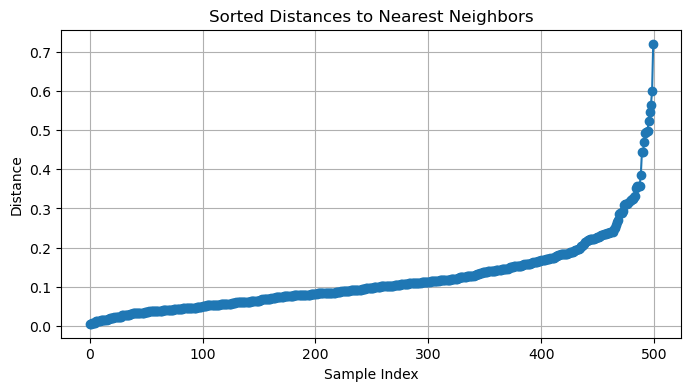

In [19]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Ignore the first column (distance to self)
plt.figure(figsize=(8, 4))
plt.plot(distances, marker='o')
plt.title('Sorted Distances to Nearest Neighbors')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [ ]:
# Define parameter ranges for DBSCAN: eps (neighborhood radius) and min_samples (minimum points to form a dense region).
eps_values = np.arange(0.15, 0.65, 0.10) 
min_samples = np.arange(2,10)

In [21]:
from itertools import product

In [22]:
# Evaluates different combinations of eps and min_samples for DBSCAN by computing the silhouette score for each, helping to identify the best clustering parameters.
best_score = -1
best_params = (None, None)

for eps, min_samples in product(eps_values, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_blobs)

    if len(set(labels)) > 1:  # More than one cluster found
        score = silhouette_score(X_blobs, labels)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters - eps: {best_params[0]}, min_samples: {best_params[1]}")

Best Silhouette Score: 0.6634206376452717
Best Parameters - eps: 0.55, min_samples: 5


# Another way

In [29]:
# Performs a grid search over combinations of eps and min_samples for DBSCAN, computing the silhouette score for each. It helps identify the best parameter set that yields meaningful clusters.

eps_values = np.arange(0.15, 0.65, 0.10) 
min_samples = np.arange(2,10)

dbscan_paramns = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X_blobs)
    if len(set(y_pred)) > 1:
        sil_scores.append(silhouette_score(X_blobs, y_pred))
    else:
        sil_scores.append(np.nan)

In [26]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

In [27]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',index='Min_Samples',columns='Eps')

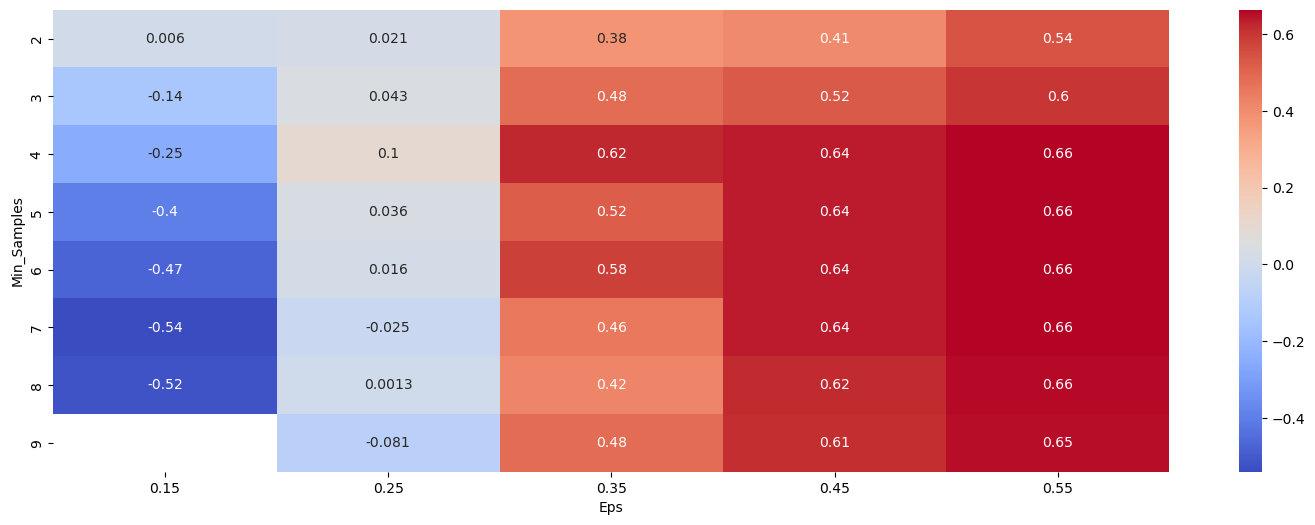

In [28]:
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

# DBSCAN Evaluation

In [30]:
model_dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_blobs_predict = model_dbscan_cluster.fit_predict(X_blobs)
df_blobs['cluster_blobs'] = y_blobs_predict

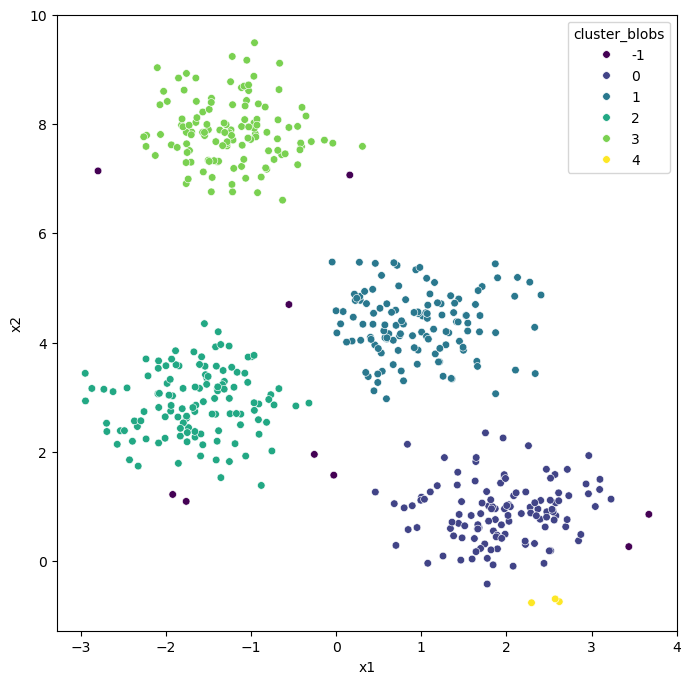

In [31]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster_blobs', palette='viridis', s=30)
plt.plot()
plt.show()

In [34]:
# evaluate the clustering results using silhouette score
silhouette_dbscan_blobs = silhouette_score(X_blobs, y_blobs_predict)
print(f'Silhouette Score for DBSCAN on Blobs: {silhouette_dbscan_blobs:.3f}')   

Silhouette Score for DBSCAN on Blobs: 0.598


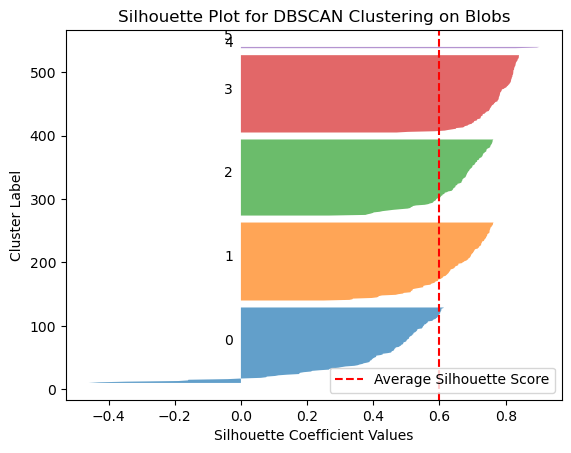

In [35]:
# plot silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_blobs, y_blobs_predict)
y_lower = 10
for i in range(len(set(y_blobs_predict))):
    # Aggregate the silhouette scores for samples belonging to the same cluster
    ith_cluster_silhouette_values = sample_silhouette_values[y_blobs_predict == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    
    y_lower = y_upper + 10  # Add 10 for the next cluster
plt.title('Silhouette Plot for DBSCAN Clustering on Blobs')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.axvline(x=silhouette_dbscan_blobs, color='red', linestyle='--', label='Average Silhouette Score')
plt.legend()
plt.show()

# ANother way

For n_clusters = 6 The average silhouette_score is : 0.5982293237531566


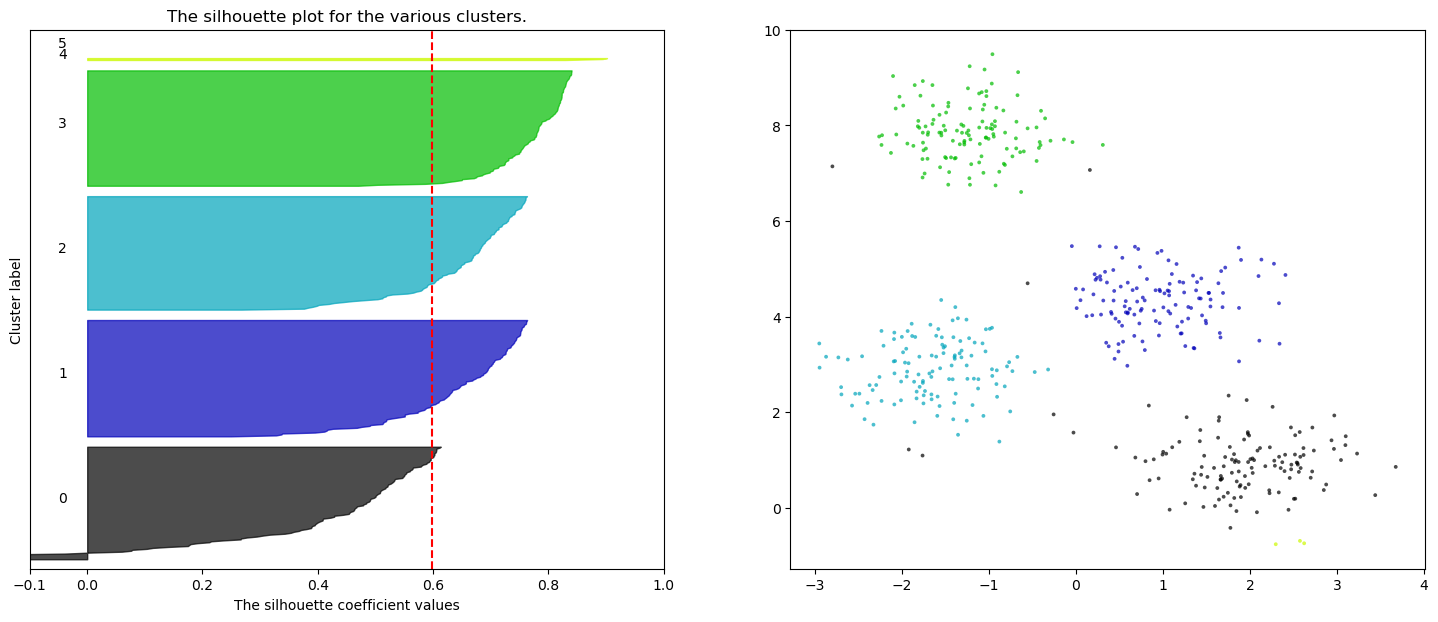

In [36]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = clusterer.fit_predict(X_blobs)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X_blobs) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_blobs, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_blobs, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X_blobs[:, 0], X_blobs[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()